In [2]:
import IO, plotting as plotz, os
from numpy import *
from matplotlib.pyplot import *
import networkx as nx
import networkx as nx
from tqdm import tqdm_notebook as tqdm
%load_ext autoreload
%autoreload 2

In [166]:
res = {}
d = f'{os.getcwd()}/Data/'
def newest(path):
    files = os.listdir(path)
    paths = [os.path.join(path, basename) for basename in files]
    return max(paths, key=os.path.getctime)
d = newest(d)

# d = newest(d)
print(d)

# d = f'{os.getcwd()}'
colors = cm.tab20(arange(12))
res = {}
for file in os.listdir(d):
    if file.endswith('.pickle') and not 'mags' in file:
        tmp = file.split('_')
        pulse = tmp[-2].split('=')[-1]
        temp  = round(float(tmp[-4].split('=')[-1]), 3)
        res[temp] = res.get(temp, ()) + ((pulse, IO.loadPickle(f'{d}/{file}')), )

rres = {}
for i, j in res.items():
    rres[i] = dict(j)
k = list(rres.keys())
print(k)

/home/casper/Projects/information-theory/Data/2018-09-04 15:05:36.078449
[2.262]


In [ ]:
import scipy
tmp = rres[k[0]]

H = zeros((50, 2))
func = lambda x, a, b, c, d, e, f : a + b * exp(-c*x)  + d * exp(-e *(x - f))
fr   = lambda x, a, b : func(x, *a) - b


%matplotlib inline
tester = {}

for idx, (i, j) in enumerate(tmp.items()):
    mi = j['mi']
    snapshots = j['snapshots']
    joint = j['joint']
    model = j['model']
    colors = cm.tab20(arange(model.nNodes))
#     if i == '{}':
    fig, ax = subplots()
    tester[i] = array([snapshots[ii] * jj for ii, jj in joint.items()])
    for jdx, MI in enumerate(mi.T):
        if model.rmapping[jdx]:
            x = arange(len(MI))
            a, b = scipy.optimize.curve_fit(func, x, MI, maxfev = 1000000)
            l =  a[0] + .2
            
            
    #         l = .2 * max(MI)
    #             l = 2/np.e
            r = scipy.optimize.root(fr, .2, args = (a, l))
        
            rot = r.x
            if rot < 0:
                rot = 0
            xx = linspace(0, max(x), 1000)
            if i == '{}':
                H[jdx, 0] = 0 if max(MI) < l else rot
            else:
                H[jdx, 1] += rot / model.nNodes
            ax.plot(xx, func(xx, *a), '--', color = colors[jdx], alpha = .2)
            ax.scatter(x, MI, color = colors[jdx], label = model.rmapping[jdx])
            ax.scatter(r.x, func(r.x, *a), \
                       color = colors[jdx], marker = 's')
            ax.set_xlim(-.2, 3)
            ax.set_ylim(0, 1)
            ax.set_title(i)
#             ax.legend(bbox_to_anchor = (1., 1.05))
#     if i != '{}':
#         close()


/home/casper/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/casper/miniconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/casper/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """
/home/casper/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


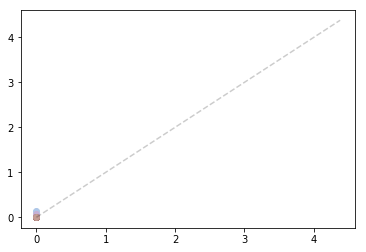

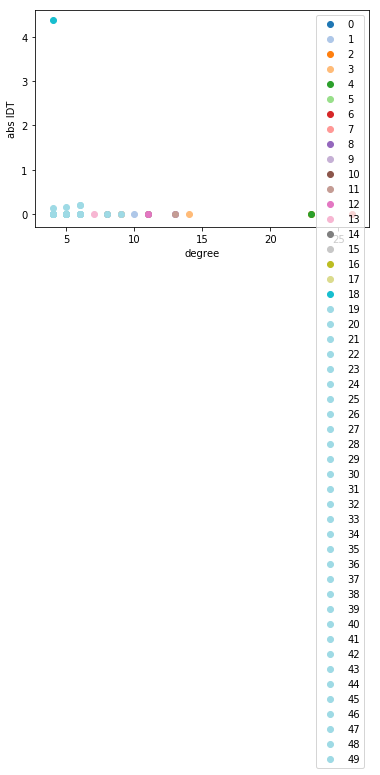

In [164]:
fig, ax = subplots()
[ax.scatter(*H[idx, :], color = colors[idx]) for idx in range(12)]

ii = min(H[:,0]), max(H[:, 0])
ax.plot(ii,ii , '--k', alpha = .2)
fig, ax = subplots()
w = 'weight'
# w = None
degs = dict(nx.degree(model.graph, weight = w))
# degs = dict(nx.betweenness_centrality(model.graph))
# degs = dict(nx.closeness_centrality(model.graph))
# degs = dict(nx.eigenvector_centrality(model.graph))
for node, deg in degs.items():
    idx = model.mapping[node]
    ax.scatter(deg, H[idx, 0], color = colors[idx], label = node)
#     ax.scatter(*H[idx, :], color = colors[idx])

setp(ax, **dict(xlabel = 'degree', ylabel = 'abs IDT'))
ax.legend()
    
show()

[Text(0,0.5,'entropy'), Text(0.5,0,'degree')]

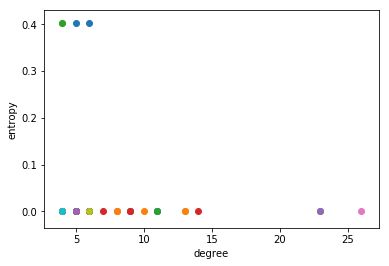

In [165]:
fig, ax = subplots()
degs = dict ( nx.degree(model.graph))
for i, j in degs.items():
    idx = model.mapping[i]
    ax.scatter(j, mi[0, idx])
setp(ax, **dict(xlabel = 'degree', ylabel = 'entropy'))


In [150]:
pxs = {}
for i, j in tmp.items():
    shape = list(joint.values())[0].shape
    px = zeros((shape))
    joint = j['joint']
    snaps = j['snapshots']
    
    for ii, jj in joint.items():
        px += snaps[ii] * jj
    pxs[i] = px


Text(0,0.5,'Hellinger distance')

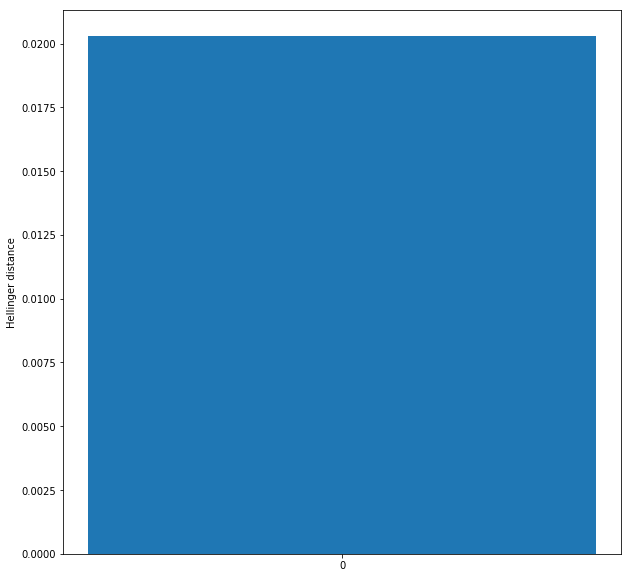

In [151]:
hd = lambda x, y : sqrt(((sqrt(x) - sqrt(y))**2).sum(-1))/sqrt(2)
control = pxs['{}'][-1, ...]
hs = {}
for i, j in pxs.items():
    if i != '{}':
        title = i.split(':')[0].split('{')[1]
        h = hd(control, j[-1, ...])
        hs[title] = h.mean()
fig, ax = subplots(figsize = (10, 10))
ax.bar(list(hs.keys()), list(hs.values()))
ax.set_ylabel('Hellinger distance')


In [ ]:

control = tester['{}']
for i, j in tester.items():
    if i != '{}':
        y = hd(control, j).mean(0)
        fig, ax = subplots()
        [ax.plot(i, color = colors[idx]) for idx, i in enumerate(y.T)]
#         ax.set_yscale('log')
        ax.set_title(i)
        